## 4-4. Building and displaying the plot

In [1]:
# 라이브러리

# pip install seaborn --upgrade

import seaborn as sns
import seaborn.objects as so

In [2]:
# data

penguins = sns.load_dataset("penguins")
tips = sns.load_dataset('tips')


#### Adding multiple layers

More complex single-subplot graphics
    -> can be created by calling Plot.add() repeatedly.

Each time it is called, it defines a layer in the plot.

For example, we may want to add a scatterplot (now using <Dots>) and then a regression fit:

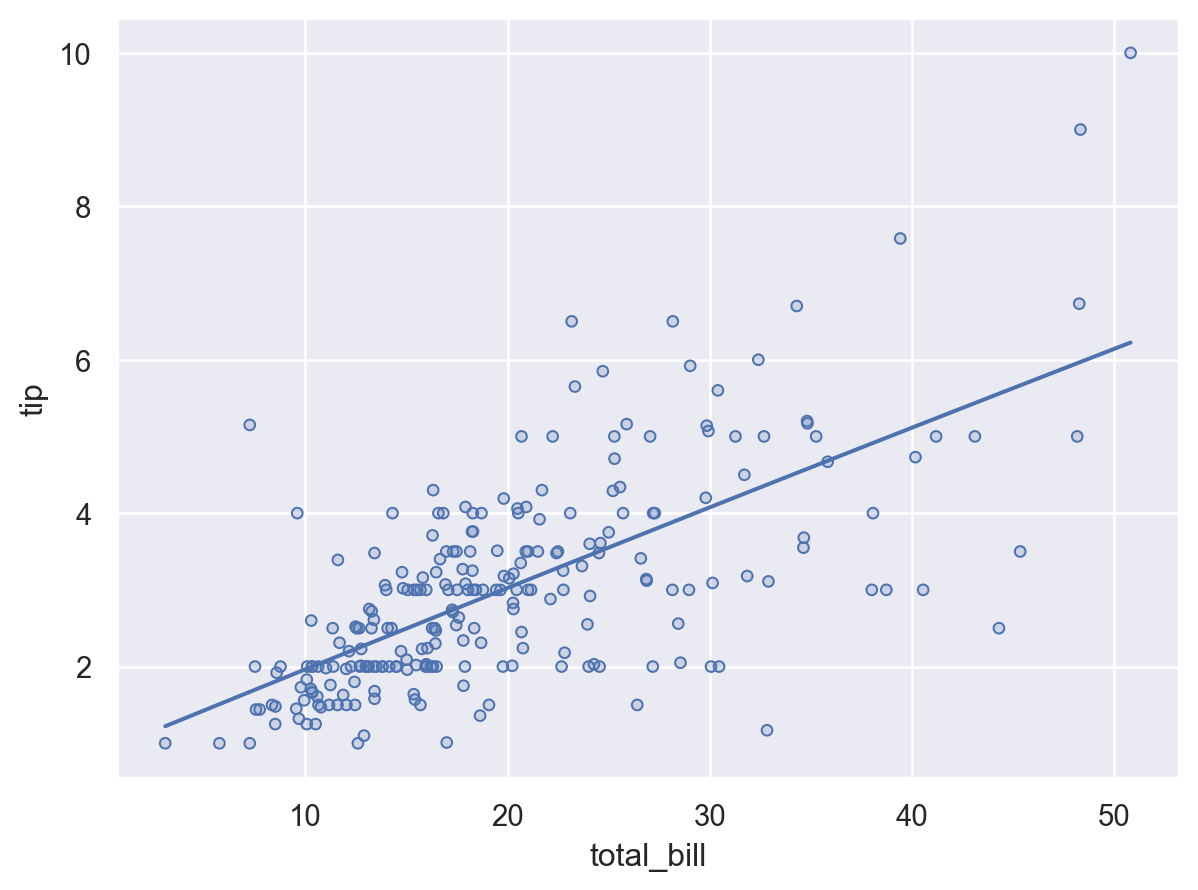

In [3]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

Variable mappings that are defined in the Plot constructor will be used for all layers.

Plot constructor에 정의된 다양한 mappings들은 모든 layer에 사용됨.

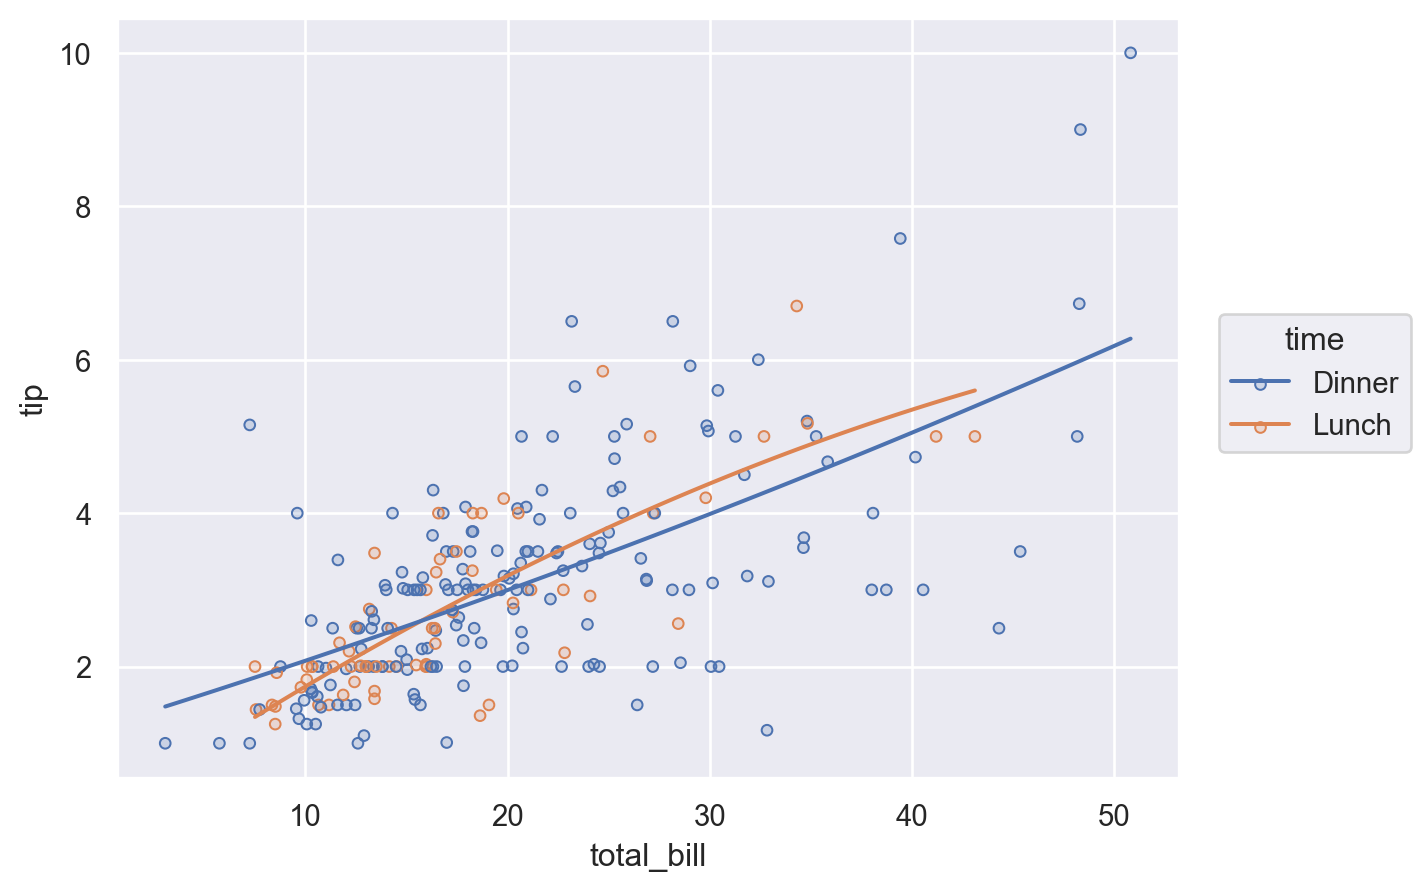

In [4]:
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

### Layer-specific mappings

You can also define a mapping such that it is used only in a specific layer.
This is accomplished by defining the mapping within the call to Plot.add for the relevant layer:

또한 그러한 mapping들은 특별한 layer에만 사용됨.
관련된 layer에 Plot.add 코드를 더해서 mapping을 정의.


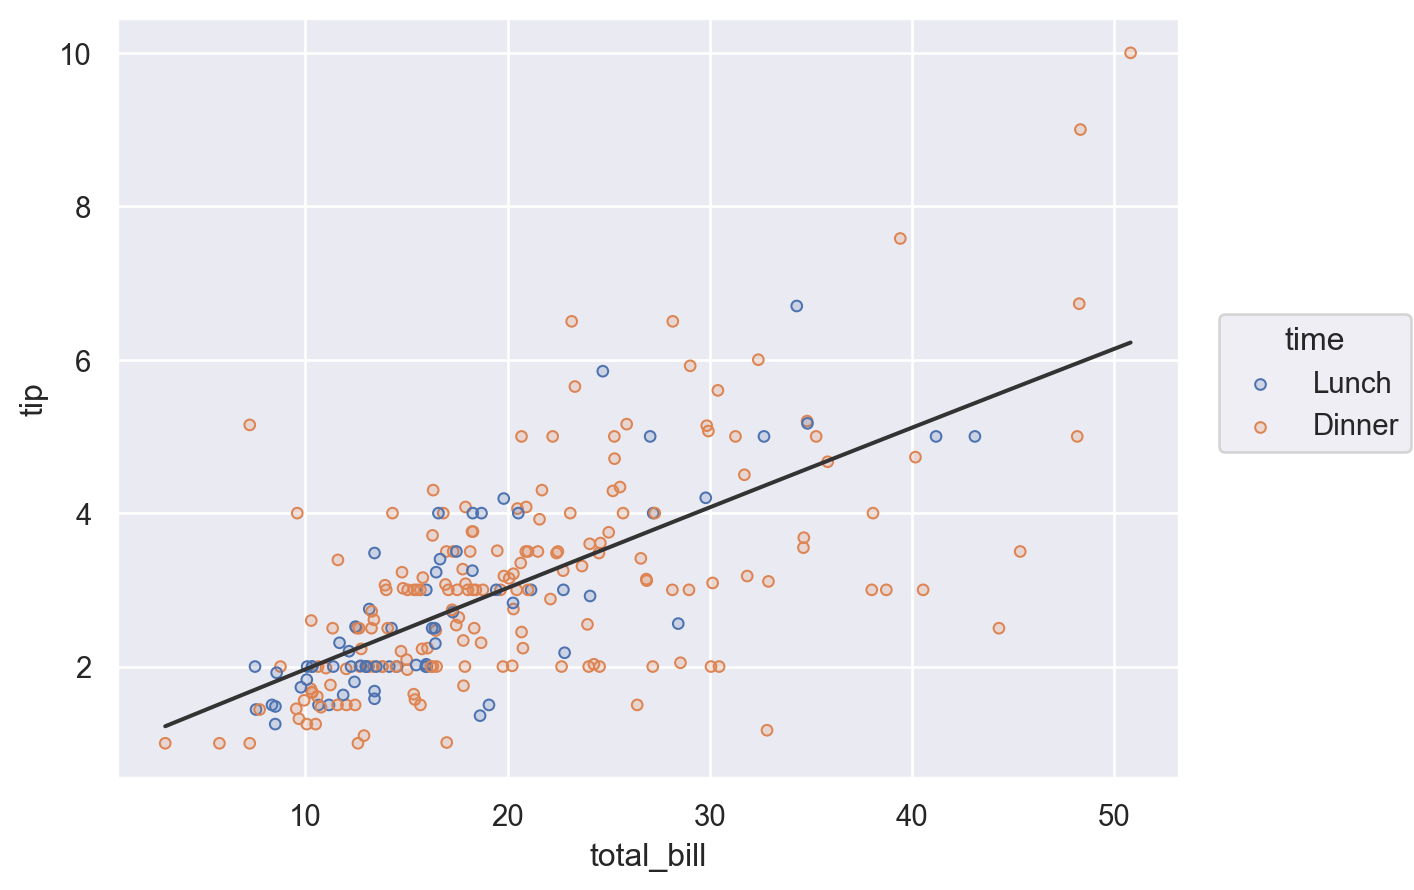

In [5]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots(), color="time")
    .add(so.Line(color=".2"), so.PolyFit())
)

To recap, there are three ways to specify the value of a mark property:

1) by mapping a variable in all layers

2) by mapping a variable in a specific layer

3) by setting the property directly

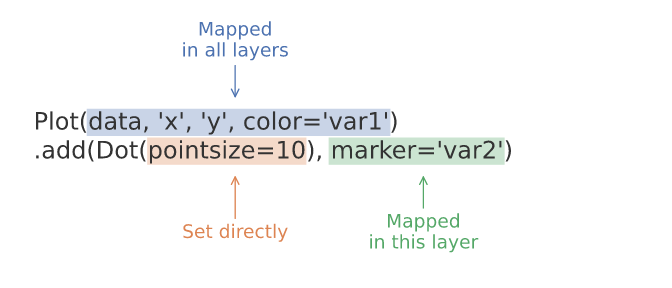

### Faceting and pairing subplots

As with seaborn's figure-level functions (seaborn.displot(), seaborn.catplot(), etc.), the Plot interface can also produce figures with multiple "facets", or subplots containing subsets of data.
This is accomplished with the Plot.facet() method:

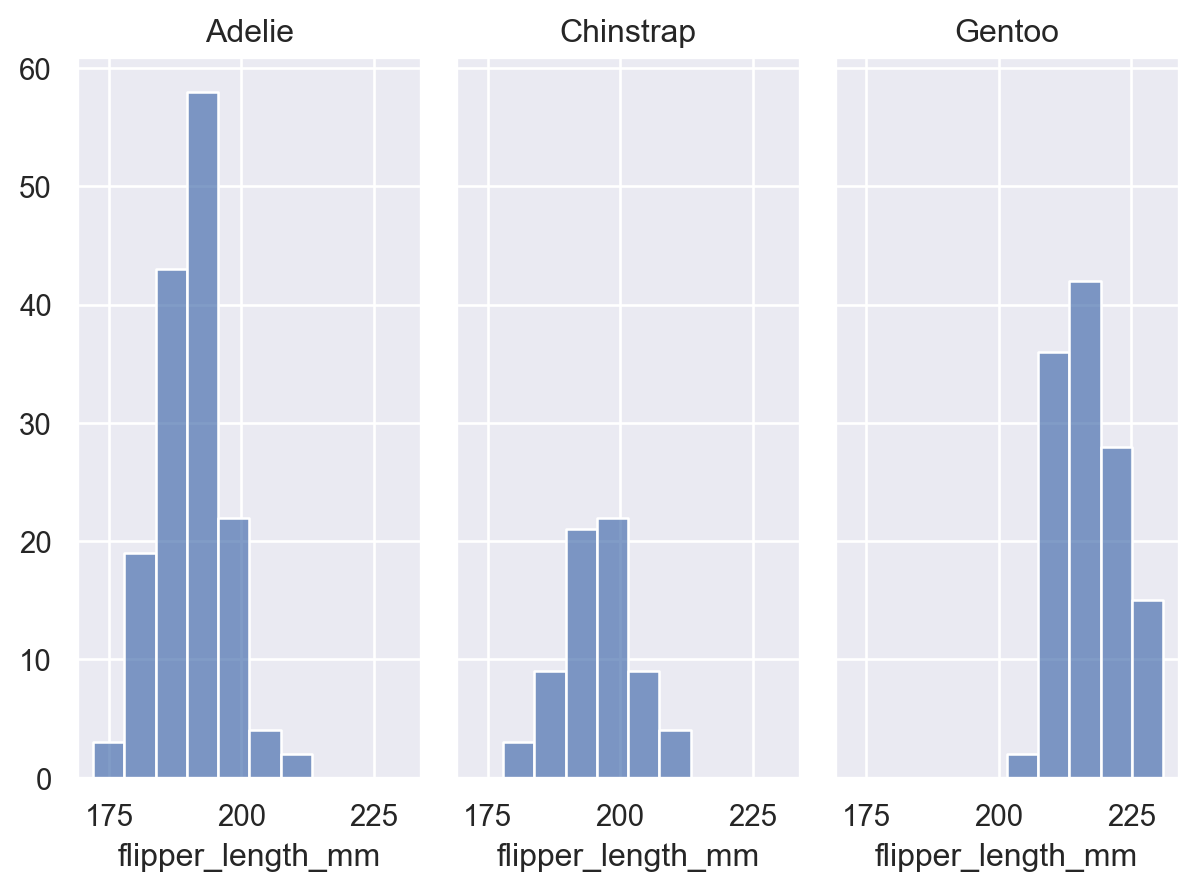

In [6]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet("species")
    .add(so.Bars(), so.Hist())
)

Call plot.facet() with the variables that should be used to define the columns and/or rows of the plot.

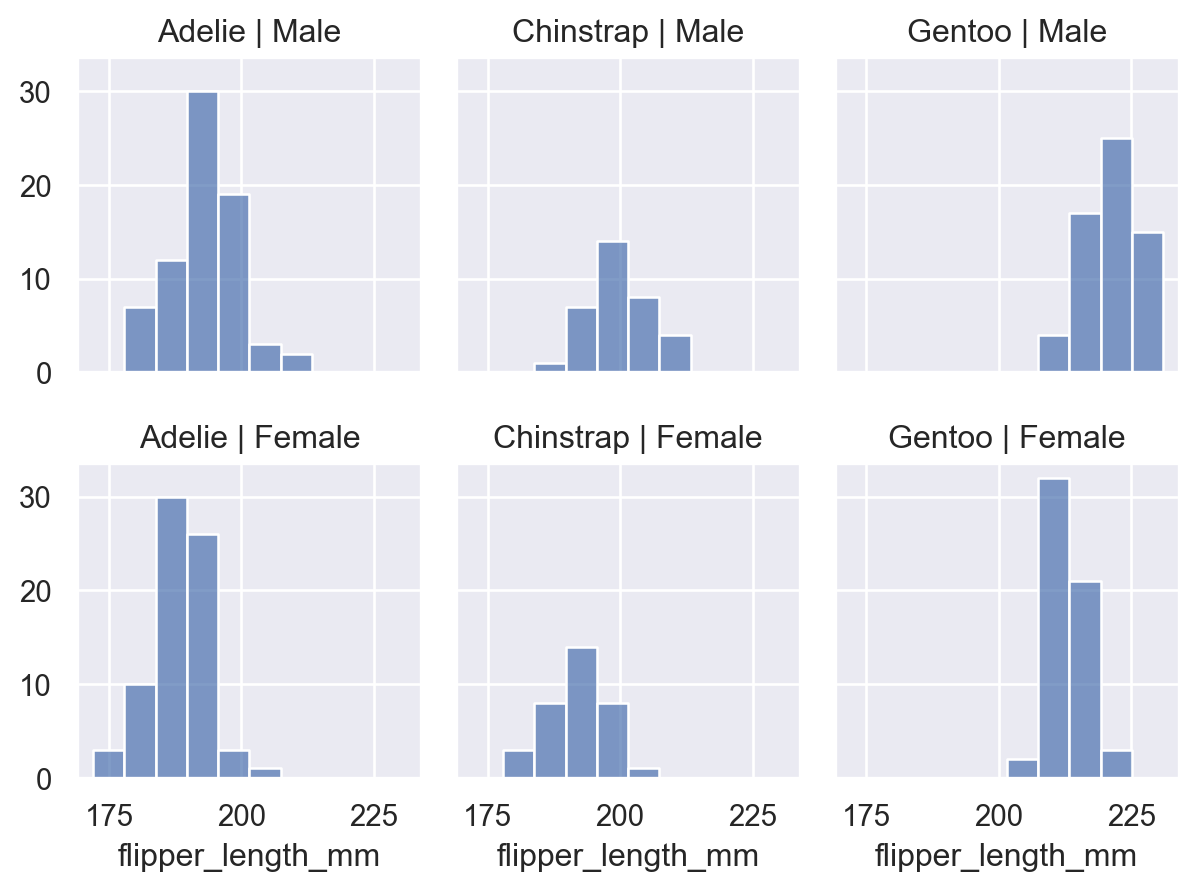

In [7]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet(col="species", row="sex")
    .add(so.Bars(), so.Hist())
)

You can facet using a variable with a larger number of levels by 'wrapping' across the other dimension.

In [9]:
healthexp = sns.load_dataset('healthexp')

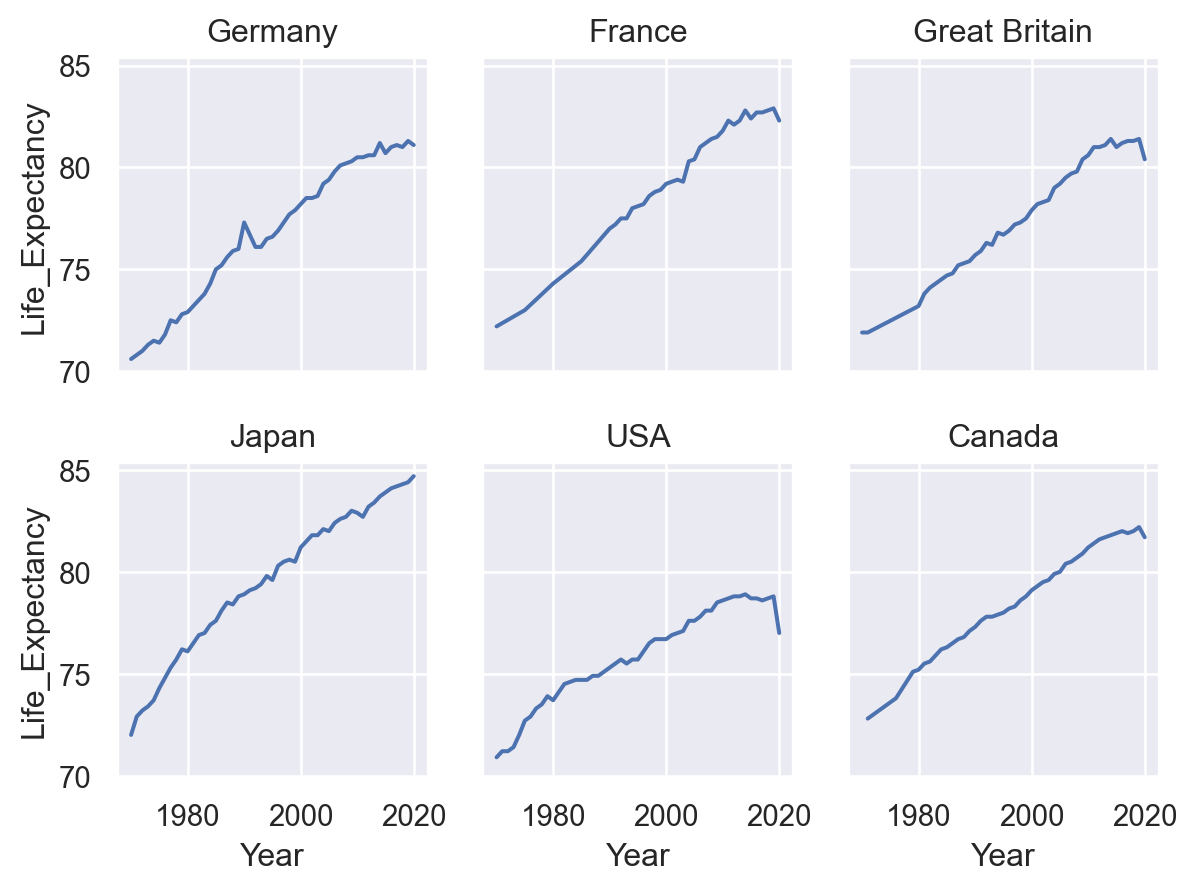

In [10]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy")
    .facet(col="Country", wrap=3)
    .add(so.Line())
)

All layers will be faceted unless you explicitly exclude them, which can be useful for providing additional context on each subplot.

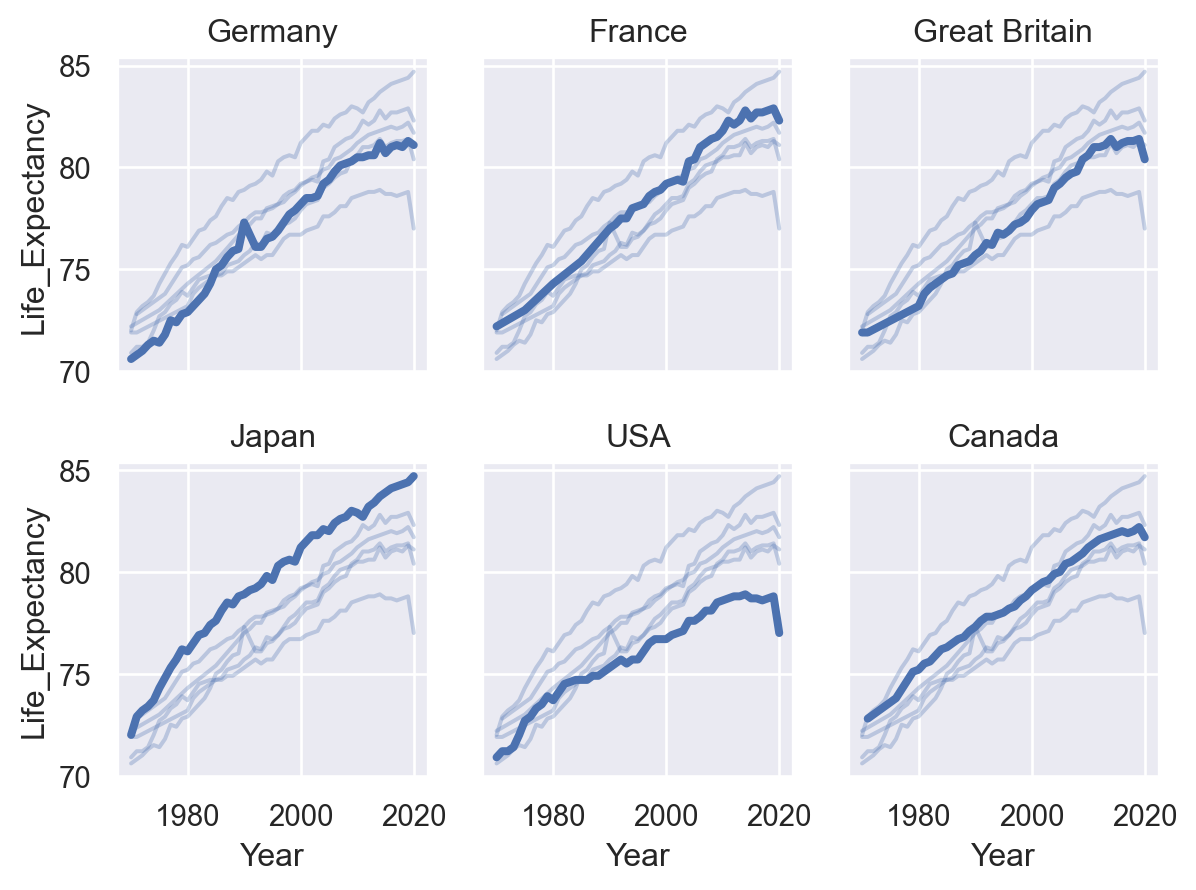

In [11]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy")
    .facet("Country", wrap=3)
    .add(so.Line(alpha=.3), group="Country", col=None)
    .add(so.Line(linewidth=3))
)

An alternate way to produce subplots is Plot.pair().

Like seaborn.PairGrid, this draws all of the data on each subplot,
using different variables for the x and/or y coordinates.

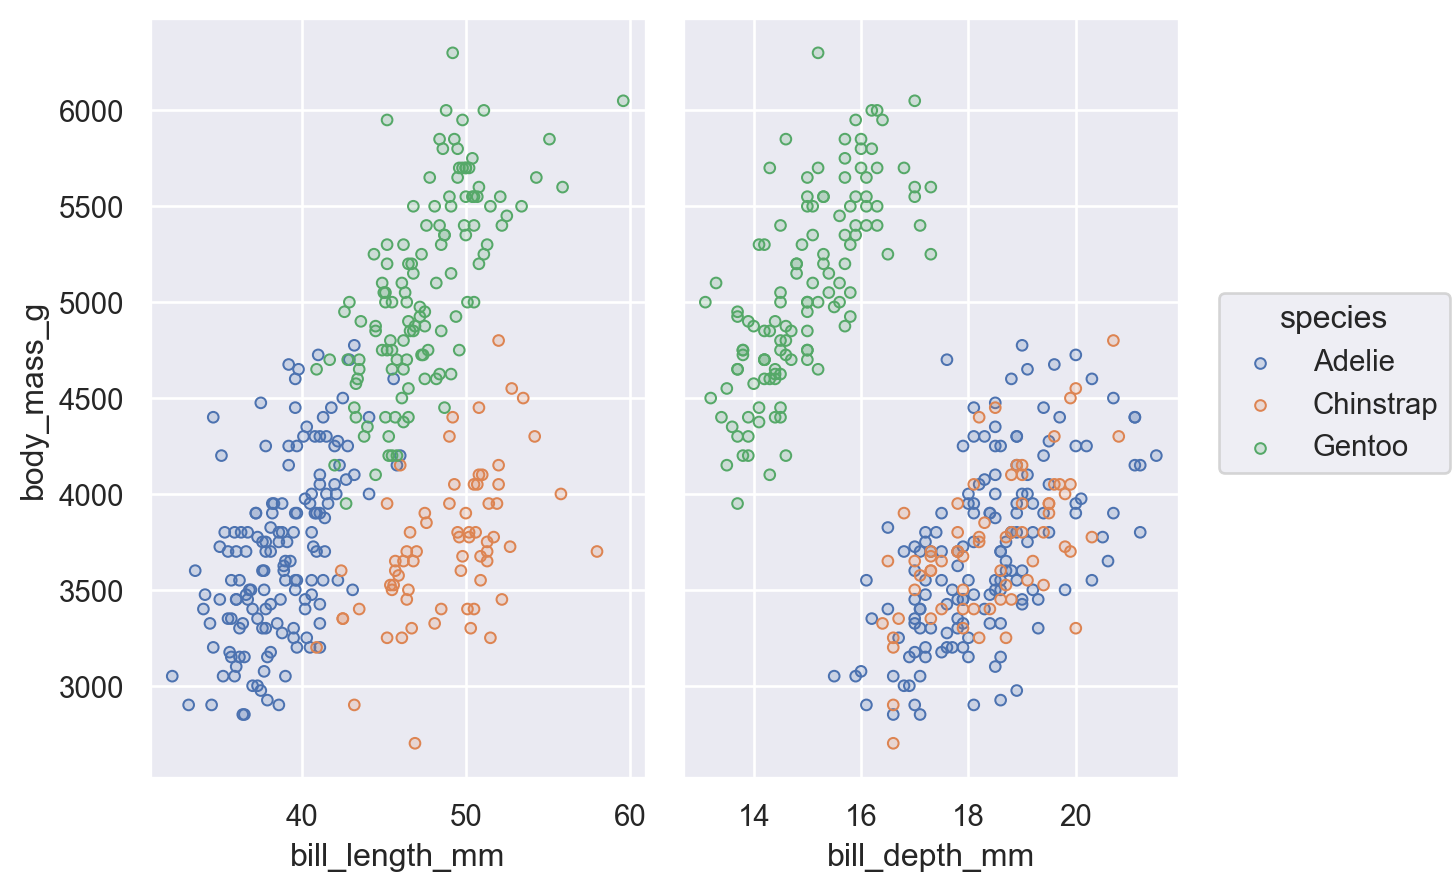

In [12]:
(
    so.Plot(penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .add(so.Dots())
)

You can combine faceting and pairing so long as the operations add subplots on opposite dimensions:

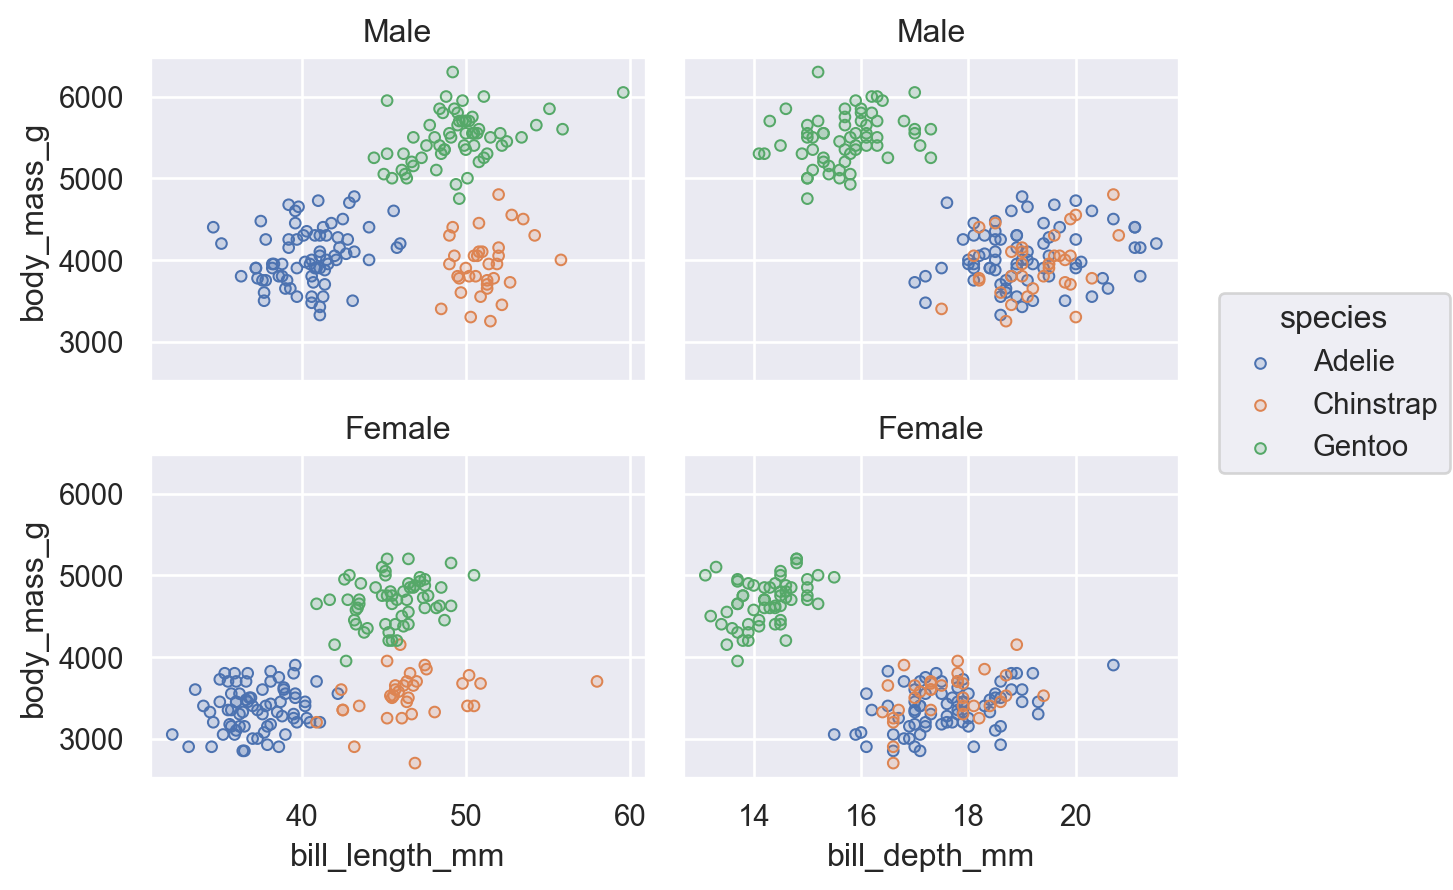

In [13]:
(
    so.Plot(penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .facet(row="sex")
    .add(so.Dots())
)

### Integrating with matplotlib

There may be cases where you want multiple subplots to appear in a figure with a more complex structure than what Plot.facet() or Plot.pair() can provide.

The current solution is to delegate figure setup to matplotlib and to supply the matplotlib object that Plot should use with the Plot.on() method.

 This object can be either a matplotlib.axes.Axes, matplotlib.figure.Figure, or matplotlib.figure.SubFigure; the latter is most useful for constructing bespoke subplot layouts:

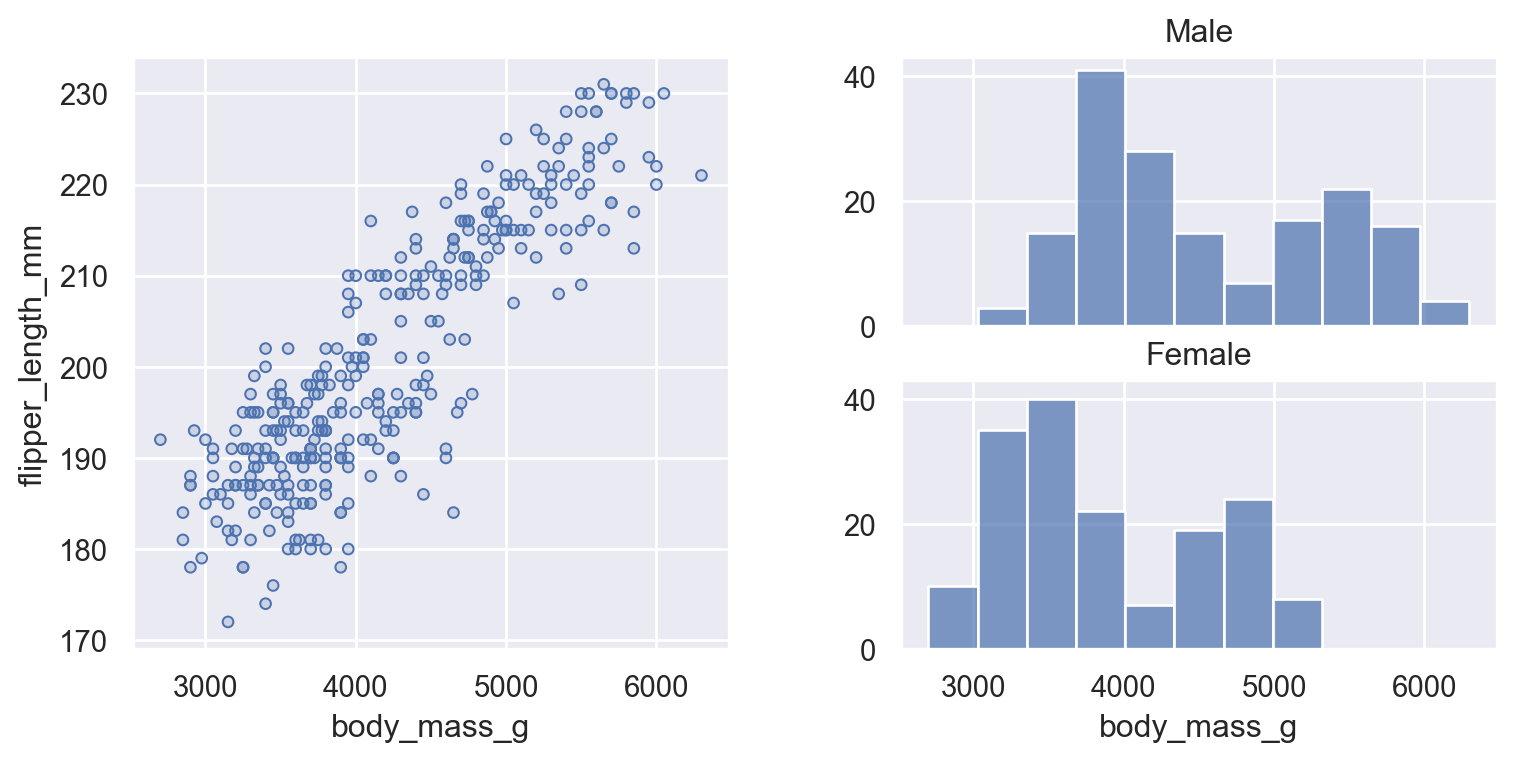

In [16]:
import matplotlib as mpl

f = mpl.figure.Figure(figsize=(8, 4))
sf1, sf2 = f.subfigures(1, 2)
(
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .add(so.Dots())
    .on(sf1)
    .plot()
)
(
    so.Plot(penguins, x="body_mass_g")
    .facet(row="sex")
    .add(so.Bars(), so.Hist())
    .on(sf2)
    .plot()
)

### Building and displaying the plot

An important thing to know is that Plot methods clone the object they are called on and return that clone instead of updating the object in place. 

This means that you can define a common plot spec and then produce several variations on it.

So, take this basic specification:

In [17]:
p = so.Plot(healthexp, "Year", "Spending_USD", color="Country")

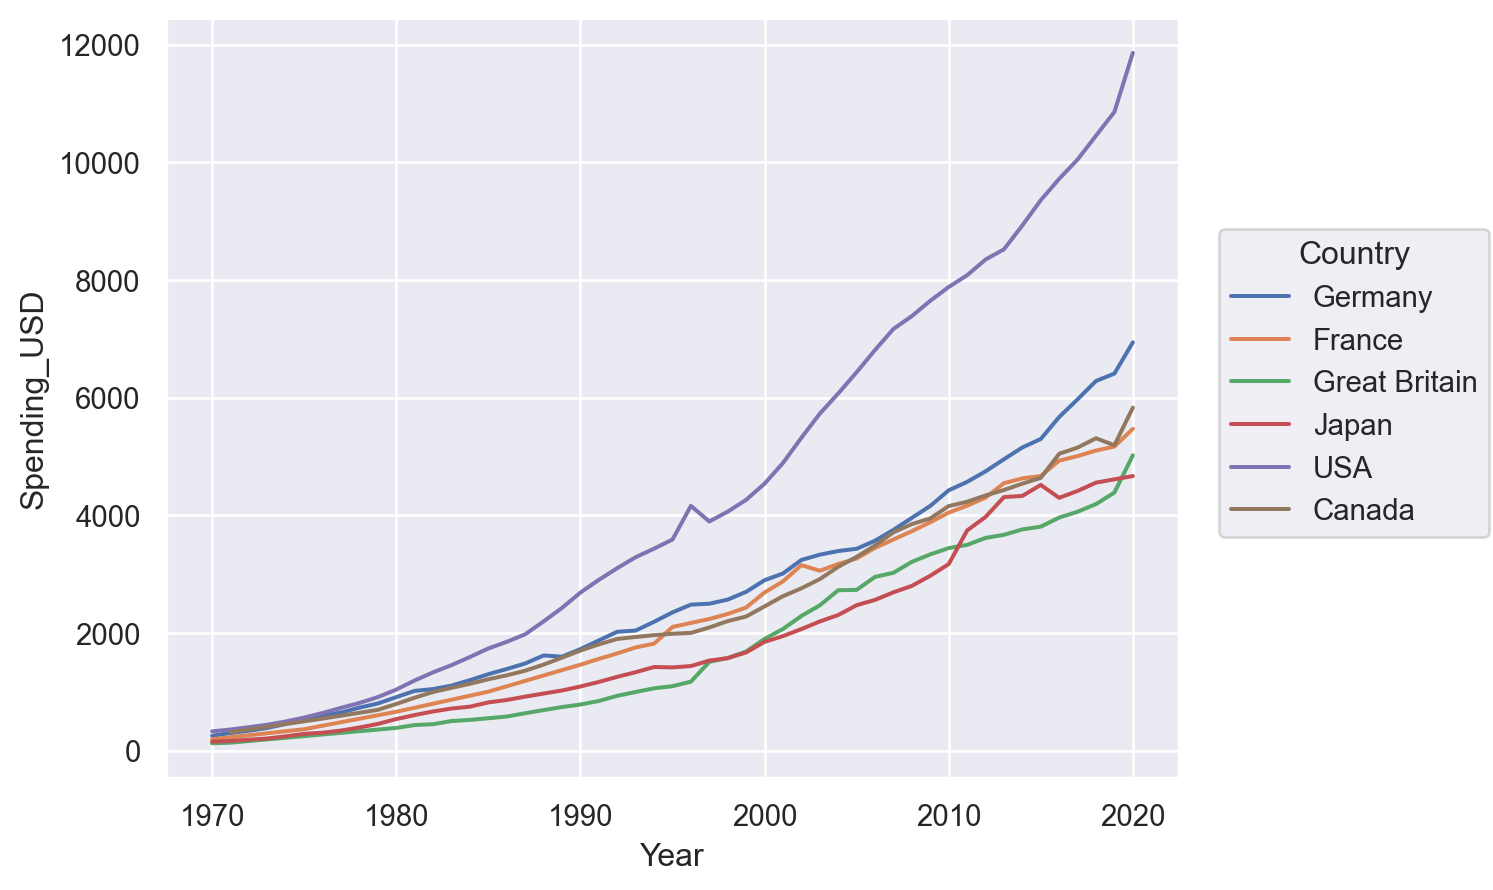

In [18]:
p.add(so.Line())

Or perhaps a stacked area plot:

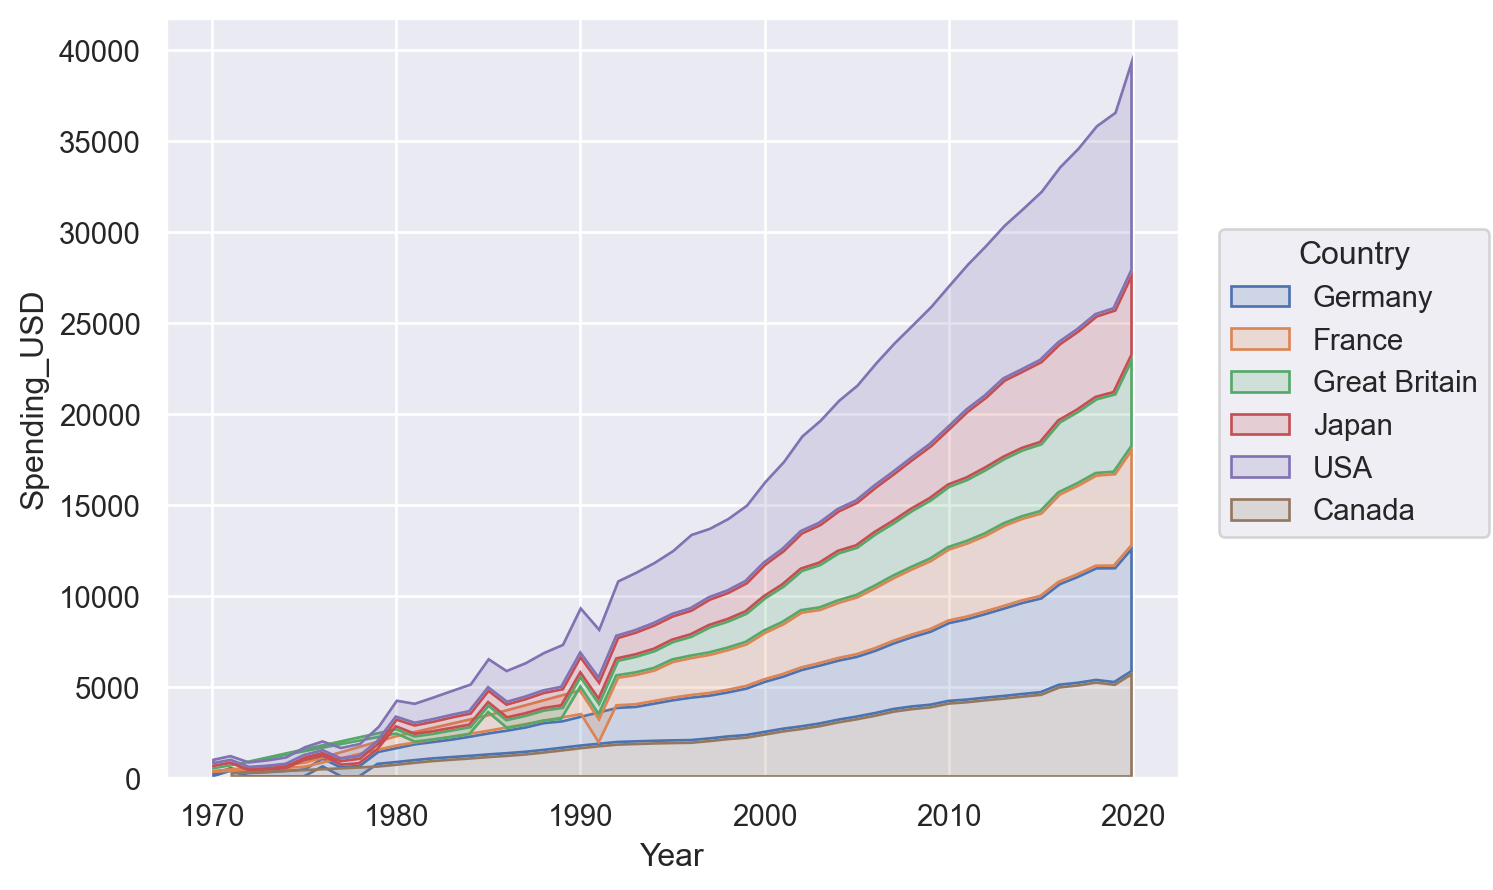

In [19]:
p.add(so.Area(), so.Stack())

The Plot methods are fully declarative. 

Calling them updates the plot spec, but it doesn’t actually do any plotting. 

One consequence of this is that methods can be called in any order, and many of them can be called multiple times.


When does the plot actually get rendered? 

Plot is optimized for use in notebook environments. 

The rendering is automatically triggered when the Plot gets displayed in the Jupyter REPL. 

That’s why we didn’t see anything in the example above, where we defined a Plot but assigned it to p rather than letting it return out to the REPL.


To see a plot in a notebook, either return it from the final line of a cell or call Jupyter’s built-in display function on the object. 

The notebook integration bypasses matplotlib.pyplot entirely, but you can use its figure-display machinery in other contexts by calling Plot.show().

You can also save the plot to a file (or buffer) by calling Plot.save().